In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
pd.__version__

'2.3.1'

In [5]:
len(df)

9704

In [8]:
df["fuel_type"].value_counts()

fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64

In [14]:
df.isna().sum().gt(0).sum()

np.int64(4)

In [15]:
df['fuel_efficiency_mpg'].max()

np.float64(25.96722204888372)

<Axes: xlabel='model_year'>

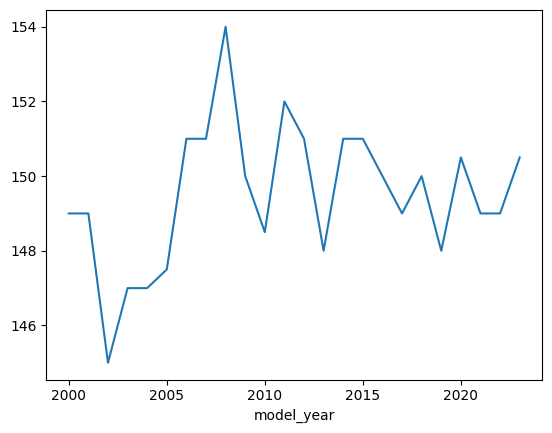

In [18]:
df.groupby('model_year')['horsepower'].median().plot()

In [19]:
df['vehicle_weight'].sum()

np.float64(29124430.759692907)